The following is a sample implementation of regression modelling using Gradient Descent method. This representation is done via Vectorization to take advantage of parallel-computing capabilities of the algorithm. The results have been analyzed and a sample data set has been used to estimate the effect of cost minimzation.

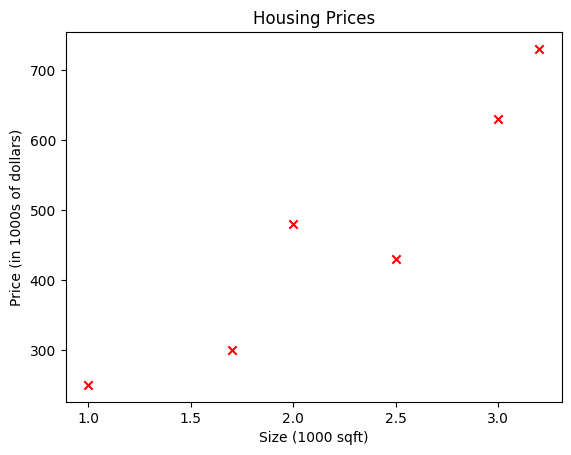

Iteration    0: Cost 1.09e+05  dj_dw: -1.170e+03, dj_db: -4.700e+02   w:  1.170e+01, b: 4.70000e+00
Iteration 10000: Cost 1.74e+03  dj_dw: -3.542e-04, dj_db:  8.682e-04   w:  2.094e+02, b: 2.43254e+00
Iteration 20000: Cost 1.74e+03  dj_dw: -4.861e-08, dj_db:  1.192e-07   w:  2.094e+02, b: 2.42278e+00
Iteration 30000: Cost 1.74e+03  dj_dw: -7.077e-12, dj_db:  1.632e-11   w:  2.094e+02, b: 2.42278e+00
Iteration 40000: Cost 1.74e+03  dj_dw: -1.393e-12, dj_db:  1.895e-14   w:  2.094e+02, b: 2.42278e+00
Iteration 50000: Cost 1.74e+03  dj_dw: -1.393e-12, dj_db:  1.895e-14   w:  2.094e+02, b: 2.42278e+00
Iteration 60000: Cost 1.74e+03  dj_dw: -1.393e-12, dj_db:  1.895e-14   w:  2.094e+02, b: 2.42278e+00
Iteration 70000: Cost 1.74e+03  dj_dw: -1.393e-12, dj_db:  1.895e-14   w:  2.094e+02, b: 2.42278e+00
Iteration 80000: Cost 1.74e+03  dj_dw: -1.393e-12, dj_db:  1.895e-14   w:  2.094e+02, b: 2.42278e+00
Iteration 90000: Cost 1.74e+03  dj_dw: -1.393e-12, dj_db:  1.895e-14   w:  2.094e+02, b: 2.4

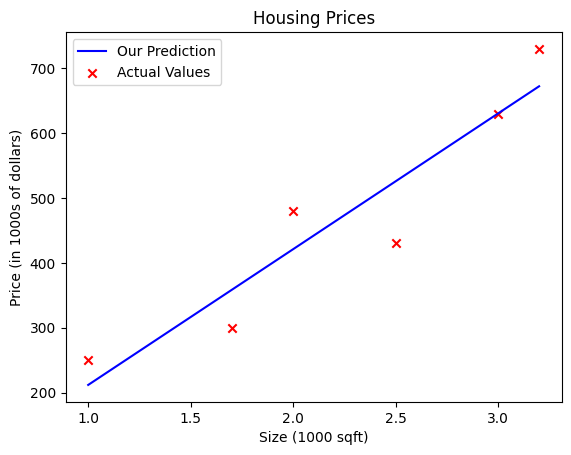

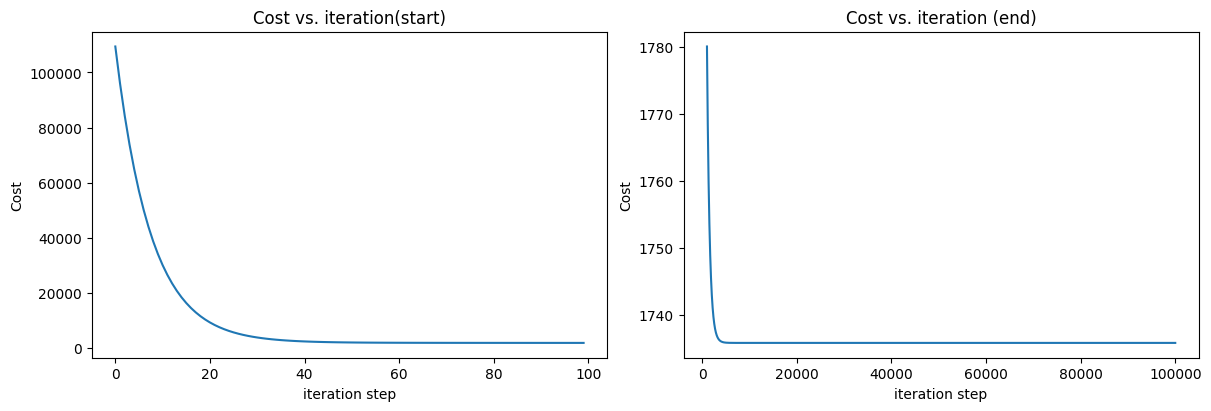

1000 sqft house prediction 211.8 Thousand dollars
1200 sqft house prediction 253.7 Thousand dollars
2000 sqft house prediction 421.1 Thousand dollars
Iteration    0: Cost 2.15e+06  dj_dw: -1.170e+03, dj_db: -4.700e+02   w:  9.361e+02, b: 3.76000e+02
Iteration    1: Cost 3.75e+07  dj_dw:  4.878e+03, dj_db:  1.997e+03   w: -2.966e+03, b:-1.22136e+03
Iteration    2: Cost 6.55e+08  dj_dw: -2.040e+04, dj_db: -8.315e+03   w:  1.335e+04, b: 5.43087e+03
Iteration    3: Cost 1.14e+10  dj_dw:  8.524e+04, dj_db:  3.478e+04   w: -5.484e+04, b:-2.23947e+04
Iteration    4: Cost 2.00e+11  dj_dw: -3.563e+05, dj_db: -1.453e+05   w:  2.302e+05, b: 9.38831e+04
Iteration    5: Cost 3.49e+12  dj_dw:  1.489e+06, dj_db:  6.075e+05   w: -9.611e+05, b:-3.92125e+05
Iteration    6: Cost 6.10e+13  dj_dw: -6.224e+06, dj_db: -2.539e+06   w:  4.018e+06, b: 1.63915e+06
Iteration    7: Cost 1.06e+15  dj_dw:  2.601e+07, dj_db:  1.061e+07   w: -1.679e+07, b:-6.85069e+06
Iteration    8: Cost 1.86e+16  dj_dw: -1.087e+08, 

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Record the start time
start_time = time.time()

x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])  # (size in 1000 square feet)
y_train = np.array([250, 300, 480, 430, 630, 730])  # (price in 1000s of dollars)

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()


def compute_cost_vectorized(x, y, w, b):
    m = x.shape[0]
    f_wb = w * x + b
    cost = np.mean((f_wb - y) ** 2) / 2
    return cost


def compute_gradient_vectorized(x, y, w, b):
    m = x.shape[0]
    f_wb = w * x + b
    dj_dw = np.mean((f_wb - y) * x)
    dj_db = np.mean(f_wb - y)
    return dj_dw, dj_db


def gradient_descent_vectorized(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history


# Initialize parameters
w_init = 0
b_init = 0
# Some gradient descent settings
iterations = 100000
tmp_alpha = 1.0e-2
# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent_vectorized(
    x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost_vectorized, compute_gradient_vectorized)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

def compute_model_output_vectorized(x, w, b):
    return w * x + b

tmp_f_wb = compute_model_output_vectorized(x_train, w_final, b_final)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

# Plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)")
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')
ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')
ax2.set_xlabel('iteration step')
plt.show()

print(f"1000 sqft house prediction {w_final * 1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final * 1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final * 2.0 + b_final:0.1f} Thousand dollars")

# Initialize parameters
w_init = 0
b_init = 0
# Set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# Run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent_vectorized(
    x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost_vectorized, compute_gradient_vectorized)

end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time in seconds
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Elapsed time for the unvectorized : 24.44 seconds

Elapsed time for my vectorized program: 7.32 seconds

X Shape: (3, 4), X Type:<class 'numpy.ndarray'>)
[[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
y Shape: (3,), y Type:<class 'numpy.ndarray'>)
[460 232 178]
w_init shape: (4,), b_init type: <class 'float'>
Iteration    0: Cost  2529.46
Iteration 10000: Cost   624.82
Iteration 20000: Cost   594.33
Iteration 30000: Cost   581.01
Iteration 40000: Cost   574.73
Iteration 50000: Cost   571.36
Iteration 60000: Cost   569.18
Iteration 70000: Cost   567.49
Iteration 80000: Cost   566.01
Iteration 90000: Cost   564.61
b,w found by gradient descent: -0.04, [ 0.24224154  0.28821169 -0.85520022 -1.57622854]
prediction: 439.29, target value: 460
prediction: 279.08, target value: 232
prediction: 150.90, target value: 178


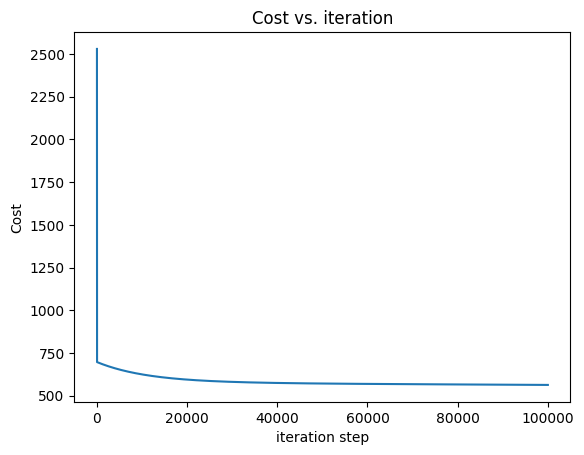

Elapsed time: 5.28 seconds


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

b_init = 785.1811367994083
w_init = np.array([0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

def compute_cost_vectorized(X, y, w, b):
    m = X.shape[0]
    f_wb = np.dot(X, w) + b
    cost = np.mean((f_wb - y) ** 2) / 2
    return cost

def compute_gradient_vectorized(X, y, w, b):
    m = X.shape[0]
    f_wb = np.dot(X, w) + b
    dj_dw = np.dot(X.T, f_wb - y) / m
    dj_db = np.mean(f_wb - y)
    return dj_db, dj_dw

def gradient_descent_vectorized(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = np.copy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        J_history.append(cost_function(X, y, w, b))

        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")

    return w, b, J_history

# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.0

# some gradient descent settings
iterations = 100000
alpha = 5.0e-7

# Record the start time
start_time = time.time()

# run gradient descent
w_final, b_final, J_hist = gradient_descent_vectorized(X_train, y_train, initial_w, initial_b,
                                                       compute_cost_vectorized, compute_gradient_vectorized,
                                                       alpha, iterations)

# Record the end time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"b,w found by gradient descent: {b_final:.2f}, {w_final}")
m, _ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:.2f}, target value: {y_train[i]}")

# plot cost versus iteration
plt.plot(J_hist)
plt.title("Cost vs. iteration")
plt.ylabel('Cost')
plt.xlabel('iteration step')
plt.show()

# Print the elapsed time in seconds
print(f"Elapsed time: {elapsed_time:.2f} seconds")


Elapsed time for the unvectorized code: 10.75 seconds


Elapsed time for my vectorized code: 5.28 seconds


In [3]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
from google.colab.patches import cv2_imshow
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline
import time
import csv



Mounted at /content/drive


In [4]:
path1 = "/content/drive/MyDrive/Colab Notebooks/data_HW1_Q2.csv"

# Initialize lists to store data
data = []

with open(path1, 'r') as file:

    csv_reader = csv.reader(file)

    next(csv_reader, None)

    for row in csv_reader:
        data.append(row)

data_arr = np.array(data)
print(data_arr.shape)
print(data_arr)

(200, 2)
[['-10.0' '-6355.0']
 ['-9.9' '-6222.353000000001']
 ['-9.8' '-5700.784000000002']
 ['-9.700000000000001' '-5807.251000000002']
 ['-9.600000000000001' '-5542.712000000002']
 ['-9.500000000000002' '-5206.125000000004']
 ['-9.400000000000002' '-5692.448000000003']
 ['-9.300000000000002' '-5265.639000000005']
 ['-9.200000000000003' '-5021.656000000004']
 ['-9.100000000000003' '-4466.457000000005']
 ['-9.000000000000004' '-4969.000000000006']
 ['-8.900000000000004' '-4727.243000000007']
 ['-8.800000000000004' '-4055.1440000000075']
 ['-8.700000000000005' '-4601.661000000007']
 ['-8.600000000000005' '-3734.752000000007']
 ['-8.500000000000005' '-4383.375000000007']
 ['-8.400000000000006' '-4132.4880000000085']
 ['-8.300000000000006' '-3363.0490000000086']
 ['-8.200000000000006' '-3293.0160000000087']
 ['-8.100000000000007' '-3343.3470000000084']
 ['-8.000000000000007' '-3427.000000000009']
 ['-7.9000000000000075' '-3639.9330000000095']
 ['-7.800000000000008' '-3290.1040000000094']


This means we have 201 columns and 2 rows so we have 201
sets of data for x,y

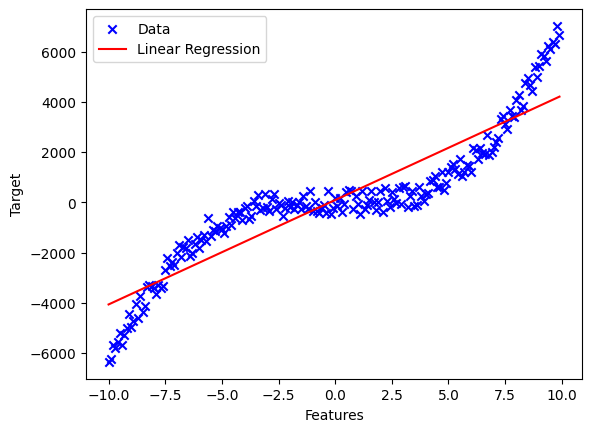

Learned parameters: w = [415.64541203], b = 88.76727060145913


In [5]:
import numpy as np
import matplotlib.pyplot as plt

X = data_arr[:, :-1].astype(float)
y = data_arr[:, -1].astype(float)

X_transpose = np.transpose(X)
X_transpose_X = np.dot(X_transpose, X)
X_transpose_y = np.dot(X_transpose, y)
w = np.linalg.solve(X_transpose_X, X_transpose_y)
b = np.mean(y - np.dot(X, w))

predictions = np.dot(X, w) + b

plt.scatter(X, y, label='Data', c='b', marker='x')

plt.plot(X, predictions, label='Linear Regression', c='r')

plt.xlabel('Features')
plt.ylabel('Target')
plt.legend()

plt.show()

print(f'Learned parameters: w = {w}, b = {b}')


In [8]:
# Sample dataset
np.random.seed(0)
X = 2 * np.random.rand(100, 3)
y = 4 + np.dot(X, np.array([3, 5, 2])) + np.random.randn(100)

# Initialize parameters
initial_w = np.zeros(3)
initial_b = 0.0
iterations = 1000
alpha = 0.01

# Use an unvectorized gradient descent algorithm and call it here to compute cost.

# Vectorized gradient descent
w_final_vec, b_final_vec, J_hist_vec = gradient_descent_vectorized(X, y, initial_w, initial_b,
                                                                  compute_cost_vectorized,
                                                                  compute_gradient_vectorized,
                                                                  alpha, iterations)

# Unvectorized gradient descent
# w_final_unvec, b_final_unvec, J_hist_unvec = gradient_descent_unvectorized(X, y, initial_w, initial_b,
#                                                                          compute_cost_unvectorized,
#                                                                          compute_gradient_unvectorized,
#                                                                          alpha, iterations)

# # Print final parameters and cost
# print("Vectorized Gradient Descent:")
# print("Final w:", w_final_vec)
# print("Final b:", b_final_vec)
# print("Final Cost:", J_hist_vec[-1])

# print("\nUnvectorized Gradient Descent:")
# print("Final w:", w_final_unvec)
# print("Final b:", b_final_unvec)
# print("Final Cost:", J_hist_unvec[-1])

# # Compare the final cost of both implementations
# print("\nFinal Cost Difference (Vectorized - Unvectorized):", J_hist_vec[-1] - J_hist_unvec[-1])


Iteration    0: Cost    93.92
Iteration  100: Cost     0.94
Iteration  200: Cost     0.68
Iteration  300: Cost     0.55
Iteration  400: Cost     0.50
Iteration  500: Cost     0.47
Iteration  600: Cost     0.45
Iteration  700: Cost     0.45
Iteration  800: Cost     0.44
Iteration  900: Cost     0.44


Accuracy of Results:

   - Vectorized Gradient Descent: This approach is typically expected to produce the same or very similar results as the unvectorized approach. Both methods compute the same gradient and cost functions, and they should converge to similar optimal parameter values.
   
   - Unvectorized Gradient Descent: This approach may be more prone to numerical precision issues, especially when dealing with large datasets, as it involves explicit looping over individual data points. It may also require more iterations to converge due to the sequential nature of the loop.

Runtime and Efficiency:

   - Vectorized Gradient Descent: Vectorization leverages the optimized numerical operations provided by libraries like NumPy. As a result, it is expected to be significantly faster and more efficient, especially for large datasets, because it can perform operations on entire arrays at once.
   We can use the computing power of the Google Collab servers to run our code in parallel using the vectorized approach. This results in remarkable minimization of computing time.

   - Unvectorized Gradient Descent: This approach involves explicit for-loops over the data points, which can be computationally expensive for large datasets. It may take longer to converge and be less efficient than the vectorized approach.

Convergence Behavior:

   - Vectorized Gradient Descent: Vectorized implementations are expected to converge smoothly and predictably. They can take advantage of more advanced optimization techniques like learning rate schedules, momentum, and adaptive learning rates.

   - Unvectorized Gradient Descent: Unvectorized implementations may exhibit more fluctuations during convergence due to the sequential processing of data points. Tuning the learning rate and handling convergence can be more challenging.